In [40]:
print("Training Data")
!cat hw1-data/income.train.txt.5k | cut -f 10 -d "," | sort | uniq -c
print("Dev Data")
!cat hw1-data/income.dev.txt | cut -f 10 -d "," | sort | uniq -c

Training Data
3749  <=50K
1251  >50K
Dev Data
 764  <=50K
 236  >50K


In [41]:
print(f'Training Data positive label (>50K): {(1251/5000)*100:.2f}%')
print(f'Dev Set positive label (>50K): {(236/1000)*100:.2f}%')

Training Data positive label (>50K): 25.02%
Dev Set positive label (>50K): 23.60%


In [3]:
%%bash
echo "Youngest: $(cat hw1-data/income.train.txt.5k | cut -f 1 -d "," | sort | head -1)"  
echo "Oldest: $(cat hw1-data/income.train.txt.5k | cut -f 1 -d "," | sort | tail -1)"

Youngest: 17
Oldest: 90


In [21]:
import matplotlib.pyplot as plt

In [22]:
import pandas as pd
train_data = pd.read_csv("hw1-data/income.train.txt.5k", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"], engine="python")
# dev_data = pd.read_csv("hw1-data/income.dev.txt", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"], engine="python")

train_data.sort_values(by=['hours'])

,age,sector,edu,marriage,occupation,race,sex,hours,country,target
158,58,State-gov,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,1,United-States,>50K
130,71,Self-emp-not-inc,Some-college,Separated,Sales,Black,Male,2,United-States,<=50K
4616,66,Private,HS-grad,Never-married,Other-service,Black,Female,3,United-States,<=50K
3494,75,Self-emp-not-inc,Doctorate,Married-civ-spouse,Prof-specialty,White,Male,3,United-States,<=50K
2726,61,Private,HS-grad,Married-civ-spouse,Adm-clerical,White,Male,3,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
3554,35,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,99,United-States,<=50K
3662,43,Self-emp-inc,Prof-school,Married-civ-spouse,Prof-specialty,Black,Male,99,United-States,>50K
1562,55,Self-emp-not-inc,Some-college,Married-civ-spouse,Farming-fishing,White,Male,99,United-States,>50K
4433,43,Private,Assoc-voc,Married-civ-spouse,Craft-repair,White,Male,99,United-States,<=50K


In [23]:
%%bash
echo "Features"
for i in {1..10}
do
    echo "coln:($i) -> $(cat hw1-data/income.train.txt.5k| cut -f $i -d ","| sort | uniq | wc -l)"
done


Features
coln:(1) ->       67
coln:(2) ->        7
coln:(3) ->       16
coln:(4) ->        7
coln:(5) ->       14
coln:(6) ->        5
coln:(7) ->        2
coln:(8) ->       73
coln:(9) ->       39
coln:(10) ->        2


Number of Features will be: 7 + 16 + 7 + 14 + 5 + 2 + 39 + 2 = 92

In [24]:
import pandas as pd
train_data = pd.read_csv("hw1-data/income.train.txt.5k", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"], engine="python")
dev_data = pd.read_csv("hw1-data/income.dev.txt", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"], engine="python")


In [25]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [26]:
from sklearn.compose import ColumnTransformer

# Binarization
train_binary_data = encoder.fit_transform(train_data[["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country",]])
dev_binary_data = encoder.transform(dev_data[["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country",]])


In [27]:
print(train_binary_data.shape[1])

230


In [28]:
print(dev_binary_data.shape[1])

230


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
X_train = pd.DataFrame(train_binary_data)
X_train.columns = X_train.columns.astype(str)
y_train = train_data["target"]

In [34]:
type(X_train)

pandas.core.frame.DataFrame

In [31]:
X_dev = pd.DataFrame(dev_binary_data)
X_dev.columns = X_dev.columns.astype(str)
y_dev = dev_data["target"]

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
best_k = 0
best_accuracy = 0

train_err = []
dev_err = []

for k in range(1,101,2):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	y_pred = knn.predict(X_train)
	accuracy = accuracy_score(y_train, y_pred)
	train_err.append((1-accuracy)*100)

	y_pred_dev = knn.predict(X_dev)
	accuracy_dev = accuracy_score(y_dev, y_pred_dev)
	dev_err.append((1-accuracy_dev)*100)

	if accuracy_dev > best_accuracy:
		best_accuracy = accuracy_dev
		best_k = k

	print(f"k = {k} train_err: {(1-accuracy) * 100:.2f}% dev_err: {(1-accuracy_dev) * 100:.2f}%")


k = 1 train_err: 1.52% dev_err: 23.20%
k = 3 train_err: 11.50% dev_err: 18.00%
k = 5 train_err: 14.38% dev_err: 16.50%
k = 7 train_err: 15.48% dev_err: 16.90%
k = 9 train_err: 16.56% dev_err: 16.10%
k = 11 train_err: 16.94% dev_err: 16.80%
k = 13 train_err: 16.72% dev_err: 16.50%
k = 15 train_err: 17.02% dev_err: 16.30%
k = 17 train_err: 17.02% dev_err: 16.30%
k = 19 train_err: 17.10% dev_err: 16.10%
k = 21 train_err: 17.24% dev_err: 16.20%
k = 23 train_err: 17.54% dev_err: 16.00%
k = 25 train_err: 17.44% dev_err: 16.20%
k = 27 train_err: 17.46% dev_err: 16.20%
k = 29 train_err: 17.76% dev_err: 16.40%
k = 31 train_err: 17.72% dev_err: 15.80%
k = 33 train_err: 17.58% dev_err: 16.00%
k = 35 train_err: 17.70% dev_err: 15.90%
k = 37 train_err: 17.72% dev_err: 16.20%
k = 39 train_err: 17.38% dev_err: 15.80%
k = 41 train_err: 17.68% dev_err: 15.90%
k = 43 train_err: 17.54% dev_err: 16.10%
k = 45 train_err: 17.52% dev_err: 16.30%
k = 47 train_err: 17.82% dev_err: 16.40%
k = 49 train_err: 17.8

In [14]:
print(f"best k: {best_k} best accuracy: {(best_accuracy) * 100:.2f} best dev error:  {(1 - best_accuracy) * 100:.2f}")

best k: 69 best accuracy: 84.40 best dev error:  15.60


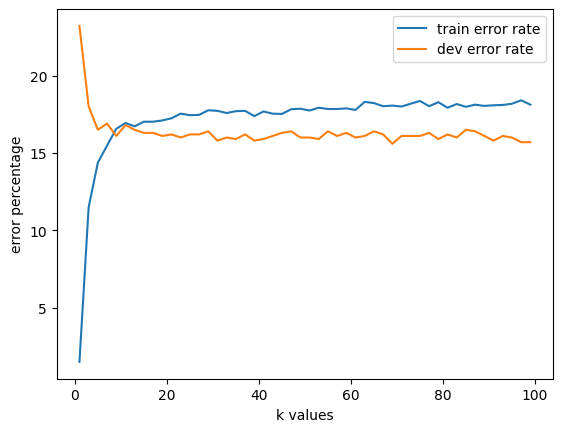

In [15]:
plt.plot([k for k in range(1,100,2)], train_err, label = 'train error rate')
plt.plot([k for k in range(1,100,2)], dev_err, label = 'dev error rate')
plt.xlabel('k values')
plt.ylabel('error percentage')
plt.legend()
plt.show()

In [16]:
# num_processor = 'passthrough'
num_processor = MinMaxScaler(feature_range=(0, 2))
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer([("num", num_processor, ["age", "hours"]), ("cat", cat_processor, ["sector", "edu", "marriage", "occupation", "race", "sex", "country"])])


In [17]:
preprocessor.fit(train_data)

ColumnTransformer(transformers=[('num', MinMaxScaler(feature_range=(0, 2)),
                                 ['age', 'hours']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sector', 'edu', 'marriage', 'occupation',
                                  'race', 'sex', 'country'])])

In [18]:
train_processed_data = preprocessor.transform(train_data)
dev_processed_data = preprocessor.transform(dev_data)

In [19]:
X_train = train_processed_data 
y_train = train_data["target"]

X_dev = dev_processed_data
y_dev = dev_data["target"]

In [20]:
X_train

array([[0.90410959, 0.24489796, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.57534247, 0.79591837, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.98630137, 0.79591837, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.20547945, 0.08163265, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.68493151, 0.79591837, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.10958904, 0.79591837, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [109]:
best_k = 0
best_accuracy = 0

train_err = []
dev_err = []

for k in range(1,101,2):
	knn = KNeighborsClassifier(n_neighbors=k)
	knn.fit(X_train, y_train)

	y_pred = knn.predict(X_train)
	accuracy = accuracy_score(y_train, y_pred)
	train_err.append((1-accuracy)*100)

	y_pred_dev = knn.predict(X_dev)
	accuracy_dev = accuracy_score(y_dev, y_pred_dev)
	dev_err.append((1-accuracy_dev)*100)

	if accuracy_dev > best_accuracy:
		best_accuracy = accuracy_dev
		best_k = k

	print(f"k = {k} train_err: {(1-accuracy) * 100:.2f}% dev_err: {(1-accuracy_dev) * 100:.2f}%")


k = 1 train_err: 1.52% dev_err: 23.70%
k = 3 train_err: 11.52% dev_err: 19.20%
k = 5 train_err: 13.76% dev_err: 18.30%
k = 7 train_err: 14.10% dev_err: 16.80%
k = 9 train_err: 15.52% dev_err: 15.90%
k = 11 train_err: 16.34% dev_err: 16.30%
k = 13 train_err: 16.34% dev_err: 16.40%
k = 15 train_err: 16.42% dev_err: 15.70%
k = 17 train_err: 16.60% dev_err: 16.10%
k = 19 train_err: 16.90% dev_err: 16.40%
k = 21 train_err: 17.02% dev_err: 15.90%
k = 23 train_err: 17.08% dev_err: 15.40%
k = 25 train_err: 16.96% dev_err: 15.00%
k = 27 train_err: 16.92% dev_err: 15.60%
k = 29 train_err: 17.00% dev_err: 15.20%
k = 31 train_err: 17.06% dev_err: 15.20%
k = 33 train_err: 17.12% dev_err: 15.50%
k = 35 train_err: 17.22% dev_err: 15.00%
k = 37 train_err: 17.20% dev_err: 14.80%
k = 39 train_err: 17.26% dev_err: 14.70%
k = 41 train_err: 17.44% dev_err: 14.30%
k = 43 train_err: 17.40% dev_err: 14.90%
k = 45 train_err: 17.60% dev_err: 15.00%
k = 47 train_err: 17.86% dev_err: 15.30%
k = 49 train_err: 18.0

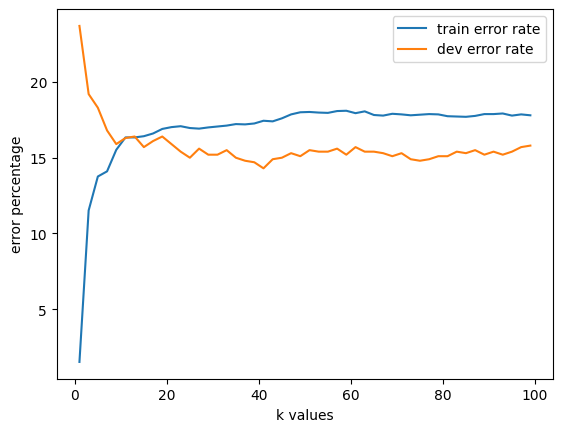

In [110]:
plt.plot([k for k in range(1,100,2)], train_err, label = 'train error rate')
plt.plot([k for k in range(1,100,2)], dev_err, label = 'dev error rate')
plt.xlabel('k values')
plt.ylabel('error percentage')
plt.legend()
plt.show()

In [111]:
print(f"best k: {best_k} best accuracy: {(best_accuracy) * 100:.2f} best dev error: {(1 - best_accuracy) * 100:.2f}")

best k: 41 best accuracy: 85.70 best dev error: 14.30


In [112]:
validate_knn = KNeighborsClassifier(n_neighbors=3)
validate_knn.fit(X_train, y_train)
dist, idx = validate_knn.kneighbors(X_dev[0].reshape(1, -1))

print(f"Euclidean:\ndistance = {dist}, Index = {idx}")

Euclidean:
distance = [[0.33441929 1.41527469 1.41674697]], Index = [[4872 4787 2591]]


In [113]:
validate_knn = KNeighborsClassifier(n_neighbors=3, metric="manhattan")
validate_knn.fit(X_train, y_train)
dist, idx = validate_knn.kneighbors(X_dev[0].reshape(1, -1))

print(f"Manhattan:\ndistance = {dist}, Index = {idx}")

Manhattan:
distance = [[0.38999161 2.05479452 2.10204082]], Index = [[4872 4787 1084]]


In [114]:
import numpy as np

In [115]:
def eu_dist(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))

def man_dist(v1, v2):
    return np.sum(np.abs(v1 - v2))

def closest_n(dists, n=3):
    return sorted(dists, key=lambda k: k[1])[:n]

In [116]:
def pair_wise_dists(vector, data, measure="eu"):
    
    all_dists = []
    for pid, pair_vector in enumerate(data):
        
        if measure == "eu":
            dist = eu_dist(vector, pair_vector)
        else:
            dist = man_dist(vector, pair_vector)    
            
        all_dists.append([pid, dist])
        
    return all_dists

In [117]:
eu_dists = pair_wise_dists(X_dev[0].reshape(1, -1), data=X_train, measure="eu")
man_dists = pair_wise_dists(X_dev[0].reshape(1, -1), data=X_train, measure="man")

print(closest_n(eu_dists))
print(closest_n(man_dists))

[[4872, 0.3344192869821078], [4787, 1.4152746869361013], [2591, 1.4167469717499104]]
[[4872, 0.38999161308358965], [4787, 2.054794520547945], [1084, 2.1020408163265305]]


In [118]:
def myKnnPredict(k, x_train, y_train, x_test, order=2):
    y_pred = []
    for x in x_test:
        distances = np.linalg.norm(x_train - x, ord=order, axis=1)
        k_indices = np.argpartition(distances, k)[:k]
        k_nearest_labels = y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    return np.array(y_pred)

In [119]:
X_train = train_processed_data 
y_train = train_data['target'].map({' <=50K': 0, ' >50K': 1})

X_dev = dev_processed_data
y_dev = dev_data['target'].map({' <=50K': 0, ' >50K': 1})

In [123]:
#for 99th
y_pred = myKnnPredict(99, X_train, y_train, X_train)
accuracy = accuracy_score(y_train, y_pred)

y_pred_dev = myKnnPredict(99, X_train, y_train, X_dev)
accuracy_dev = accuracy_score(y_dev, y_pred_dev)

print(f"k = 99 train_err: {(1-accuracy) * 100:.2f}% dev_err: {(1-accuracy_dev) * 100:.2f}%")


k = 99 train_err: 17.82% dev_err: 15.60%


In [120]:
best_man_k = 0
best_eu_k = 0

best_man_accuracy = 0
best_eu_accuracy = 0

man_dev_err = []
eu_dev_err = []

for k in range(1, 101, 2):
    # y_pred = myKnnPredict(k, X_train, y_train, X_train)
    # accuracy = accuracy_score(y_train, y_pred)

    #Manhattan
    man_y_pred_dev = myKnnPredict(k, X_train, y_train, X_dev, order=1)
    man_accuracy_dev = accuracy_score(y_dev, man_y_pred_dev)
    man_dev_err.append((1-man_accuracy_dev)*100)

    #Euclidean
    eu_y_pred_dev = myKnnPredict(k, X_train, y_train, X_dev, order=2)
    eu_accuracy_dev = accuracy_score(y_dev, eu_y_pred_dev)
    eu_dev_err.append((1-eu_accuracy_dev)*100)

    if man_accuracy_dev > best_man_accuracy:
        best_man_accuracy = man_accuracy_dev
        best_man_k = k
    
    if eu_accuracy_dev > best_eu_accuracy:
        best_eu_accuracy = eu_accuracy_dev
        best_eu_k = k

    # print(f"k = {k} man_dev_err: {(1-man_accuracy_dev) * 100:.2f}% eu_dev_err: {(1-eu_accuracy_dev) * 100:.2f}%")


In [121]:
print(f"Manhattan:\nbest k: {best_man_k} best accuracy: {(best_man_accuracy) * 100:.2f}")
print(f"Euclidean:\nbest k: {best_eu_k} best accuracy: {(best_eu_accuracy) * 100:.2f}")

Manhattan:
best k: 41 best accuracy: 85.90
Euclidean:
best k: 41 best accuracy: 85.60


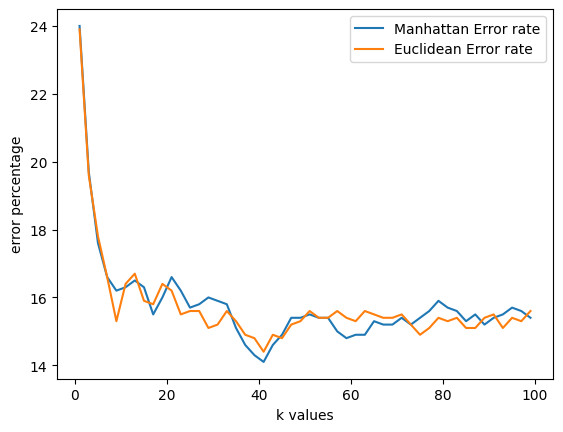

In [122]:
plt.plot([k for k in range(1,100,2)], man_dev_err, label = 'Manhattan Error rate')
plt.plot([k for k in range(1,100,2)], eu_dev_err, label = 'Euclidean Error rate')
plt.xlabel('k values')
plt.ylabel('error percentage')
plt.legend()
plt.show()

In [124]:
#for 41th
y_pred = myKnnPredict(41, X_train, y_train, X_dev, order=1)
accuracy = accuracy_score(y_dev, y_pred)

pos_ratio = np.sum(y_pred)/len(y_pred)

print(f"k = 41 dev_error: {(1-accuracy) * 100:.2f}% pos_ratio: {(pos_ratio) * 100:.2f}%")

k = 41 dev_error: 14.10% pos_ratio: 20.50%


In [125]:
train_data = pd.read_csv("hw1-data/income.train.txt.5k", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country", "target"], engine="python")
blind_data = pd.read_csv("hw1-data/income.test.blind", sep=",", names=["age", "sector", "edu", "marriage", "occupation", "race", "sex", "hours", "country"], engine="python")


In [126]:
num_processor = MinMaxScaler(feature_range=(0, 2))
cat_processor = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
preprocessor = ColumnTransformer([("num", num_processor, ["age", "hours"]), ("cat", cat_processor, ["sector", "edu", "marriage", "occupation", "race", "sex", "country"])])


In [127]:
preprocessor.fit(train_data)

train_processed_data = preprocessor.transform(train_data)
blind_processed_data = preprocessor.transform(blind_data)

In [128]:
X_train = train_processed_data 
y_train = train_data['target'].map({' <=50K': 0, ' >50K': 1})

X_blind = blind_processed_data

In [131]:
# for k = 41
y_pred = myKnnPredict(41, X_train, y_train, X_blind, order=1)
# print(y_pred)
pos_ratio = np.sum(y_pred)/len(y_pred)
pos_ratio


0.208

In [132]:
target_values = []
for t in y_pred.tolist():
    if t == 1:
        target_values.append('>50K')
    else:
        target_values.append('<=50K')

In [136]:
blind_data['target'] = target_values
blind_data.to_csv('hw1-data/income.test.predicted', sep=',', index=False, header=False)